## **Análise exploratória, pré-processamento de dados e previsão de séries temporais de um conjunto de dados referente a população indiana**
#### O estudo ora realizado tem por escopo a análise exploratória, o pré-processamento de dados, a visualização da informação e a previsão da população indiana para os anos de 2021 a 2025. O dataset utilizado contém informações ora anuais e ora quinquenais a respeito da população indiana, incluindo seu tamanho, variação percentual, variação absoluta, migração líquida, projeção de crescimento e outras. Utilizando-se de modelos estatísticos para previsão de séries temporais, a saber, os modelos ARIMA (modelo auto-regressivo integrado de médias moveis) e regressão linear, ambos pertencentes ao conjunto de algoritmos de aprendizado supervisionado, almeja-se testar a hipótese de que a população indiana continuará crescendo, fornecendo um comparativo em relação a previsão contida no conjunto de dados. O presente estudo se justifica pelo fato de que, desde 2023, a população indiana é a maior do mundo, com o país apresentando crescimentos econômicos robustos nos últimos anos, gerando efeitos no consumo global, meio ambiente, na reorganização das cadeias produtivas globais e no fluxo financeiro e de capitais.

In [77]:
pip install -q ydata-profiling

Instalação da biblioteca ydata-profiling, utilizada para gerar relatórios exploratórios de dados automatizados

In [78]:
pip install -q pmdarima

Instalação da biblioteca pmdarima, utilizada para a realização de previsões de séries temporais com o modelo ARIMA

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ydata_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

Importação das bibliotecas a seguir:
- Pandas, utilizada para manipulação e análise de dados
- Matplotlib, para visualização da informação
- Numpy, para a realização de computações numéricas e operações matemáticas de alta performance
- ProfileReport, para a geração de relatórios exploratórios de dados automatizados
- Adfuller, para a realização do Teste de Dickey-Fuller Aumentado (ADF), que verifica a estacionariedade de uma série temporal
- Auto Arima, utilizada para a previsão de séries temporais com a geração automatizada dos melhores parâmetros p (autoregressivo), d (integrado) e q (média móvel)
- Mean Absoluto Error e Mean Squared Error: métricas de avaliação de desempenho em modelos de previsão de séries temporais

In [80]:
df = pd.read_csv('population.csv')

Leitura e atribuição dos dados a variável df

In [81]:
df.shape

(24, 13)

Quantidade de linhas e colunas do dataset

In [82]:
df.head(24)

Year  Yearly % \nChange  Yearly\nChange  Migrants (net)  Median Age  \
0   2050               0.23         3711367             NaN        38.1   
1   2045               0.35         5585537       -414772.0        36.6   
2   2040               0.50         7793541       -415736.0        35.0   
3   2035               0.66        10016298       -415732.0        33.3   
4   2030               0.80        11726140       -440124.0        31.7   
5   2025               0.92        13001447       -464081.0        30.0   
6   2020               1.04        13970396       -532687.0        28.4   
7   2019               1.02        13775474       -532687.0        27.1   
8   2018               1.04        13965495       -532687.0        27.1   
9   2017               1.07        14159536       -532687.0        27.1   
10  2016               1.10        14364846       -532687.0        27.1   
11  2015               1.20        15174247       -470015.0        26.8   
12  2010               1.47        17334249       -531169.0        25.1   
13  2005               1.67        18206876       -377797.0        23.8   
14  2000               1.85        18530592       -136514.0        22.7   
15  1995               1.99        18128958       -110590.0        21.8   
16  1990               2.17        17783558          9030.0        21.1   
17  1985               2.33        17081433        115942.0        20.6   
18  1980               2.32        15169989        222247.0        20.2   
19  1975               2.33        13582621        421208.0        19.7   
20  1970               2.15        11213294        -68569.0        19.3   
21  1965               2.07         9715129        -17078.0        19.6   
22  1960               1.91         8133417        -30805.0        20.2   
23  1955               1.72         6711079        -21140.0        20.7   

    Fertility Rate  Density (P/Km²)  Urban\nPop %  Urban Population  \
0             2.24              551          53.5         876613025   
1             2.24              545          50.1         811749463   
2             2.24              536          46.7         744380367   
3             2.24              523          43.5         675456367   
4             2.24              506          40.4         607341981   
5             2.24              486          37.6         542742539   
6             2.24              464          35.0         483098640   
7             2.36              460          34.5         471828295   
8             2.36              455          34.1         460779764   
9             2.36              450          33.6         449963381   
10            2.36              445          33.2         439391699   
11            2.40              441          32.7         429069459   
12            2.80              415          30.8         380744554   
13            3.14              386          29.1         334479406   
14            3.48              355          27.6         291350282   
15            3.83              324          26.5         255558824   
16            4.27              294          25.5         222296728   
17            4.68              264          24.3         190321782   
18            4.97              235          23.0         160941941   
19            5.41              210          21.3         132533810   
20            5.72              187          19.7         109388950   
21            5.89              168          18.7          93493844   
22            5.90              152          17.9          80565723   
23            5.90              138          17.6          71958495   

    Country's Share of\nWorld Pop World Population  India\nGlobal Rank  \
0                           16.84       9735033990                   1   
1                           17.09       9481803274                   1   
2                           17.31       9198847240                   1   
3                           17.48       8887524213      

Demonstração das linhas e colunas do dataset. É possível perceber que a população mundial em 1955, "2,77,30,19,936", está com um erro de formatação. Além disso, a população indiana segue um trajetória crescente desde 1955, com o arrefecimento da variação percentual apenas a partir de 1985. A fertility rate é decrescente mas, ainda assim, positiva.

Definição dos atributos do dataset:

Year: ano ao qual os dados presentes em determinada linha se referem.

Yearly % \nChange: variação percentual da população indiana.

Yearly\nChange: variação absoluta da população indiana.

Migrants (net): balanço entro o número de pessoas que entram e saem da Índia através de processos migratórios.

Median Age: idade mediana da população indiana.

Fertility Rate: a taxa de fertilidade refere-se ao número médio de filhos que uma mulher indiana teria ao longo de sua vida.

Density (P/Km²): densidade populacional indiana, correspondendo ao número de pessoas por quilômetro quadrado.

Urban\nPop %: percentual da população indiana que reside em áreas urbanas.

Urban Population: número absoluto da população indiana que reside em áreas urbanas.

Country's Share of\nWorld Pop: percentual da população indiana em relação a população global.

World Population: tamanho da população global.

India\nGlobal Rank: posição da Índia no ranking da população global. Percebe-se que, no conjunto de dados, a Índia só aparece em primeiro lugar em 2030. Na verdade, o país alcançou tal posição em 2023.

Population: tamanho da população indiana.

In [83]:
df.dtypes

Year                               int64
Yearly % \nChange                float64
Yearly\nChange                     int64
Migrants (net)                   float64
Median Age                       float64
Fertility Rate                   float64
Density (P/Km²)                    int64
Urban\nPop %                     float64
Urban Population                   int64
Country's Share of\nWorld Pop    float64
World Population                  object
India\nGlobal Rank                 int64
Population                         int64
dtype: object

Tipos dos dados existentes no conjunto de dados

In [84]:
df['World Population'][-1:] = '2773019936'

<ipython-input-84-628f53ab1b0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['World Population'][-1:] = '2773019936'


Tratamento dos dados da quantidade da população mundial em 1955

In [85]:
df.tail()

Year  Yearly % \nChange  Yearly\nChange  Migrants (net)  Median Age  \
19  1975               2.33        13582621        421208.0        19.7   
20  1970               2.15        11213294        -68569.0        19.3   
21  1965               2.07         9715129        -17078.0        19.6   
22  1960               1.91         8133417        -30805.0        20.2   
23  1955               1.72         6711079        -21140.0        20.7   

    Fertility Rate  Density (P/Km²)  Urban\nPop %  Urban Population  \
19            5.41              210          21.3         132533810   
20            5.72              187          19.7         109388950   
21            5.89              168          18.7          93493844   
22            5.90              152          17.9          80565723   
23            5.90              138          17.6          71958495   

    Country's Share of\nWorld Pop World Population  India\nGlobal Rank  \
19                          15.27       4079480606                   2   
20                          15.00       3700437046                   2   
21                          14.95       3339583597                   2   
22                          14.85       3034949748                   2   
23                          14.78       2773019936                   2   

    Population  
19   623102897  
20   555189792  
21   499123324  
22   450547679  
23   409880595

Demonstração das últimas cinco linhas do dataset

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          24 non-null     int64  
 1   Yearly % 
Change              24 non-null     float64
 2   Yearly
Change                 24 non-null     int64  
 3   Migrants (net)                23 non-null     float64
 4   Median Age                    24 non-null     float64
 5   Fertility Rate                24 non-null     float64
 6   Density (P/Km²)               24 non-null     int64  
 7   Urban
Pop %                   24 non-null     float64
 8   Urban Population              24 non-null     int64  
 9   Country's Share of
World Pop  24 non-null     float64
 10  World Population              24 non-null     object 
 11  India
Global Rank             24 non-null     int64  
 12  Population                    24 non-null     int64  
dtypes: floa

Nome das colunas, quantidade de dados não nulos e tipo dos dados

In [87]:
df.isnull().sum()

Year                             0
Yearly % \nChange                0
Yearly\nChange                   0
Migrants (net)                   1
Median Age                       0
Fertility Rate                   0
Density (P/Km²)                  0
Urban\nPop %                     0
Urban Population                 0
Country's Share of\nWorld Pop    0
World Population                 0
India\nGlobal Rank               0
Population                       0
dtype: int64

Quantidade de dados nulos por coluna

In [88]:
df = df.sort_values(by='Year').reset_index(drop=True)
df['Migrants (net)'] = df['Migrants (net)'].interpolate(method='linear')
df.tail()

Year  Yearly % \nChange  Yearly\nChange  Migrants (net)  Median Age  \
19  2030               0.80        11726140       -440124.0        31.7   
20  2035               0.66        10016298       -415732.0        33.3   
21  2040               0.50         7793541       -415736.0        35.0   
22  2045               0.35         5585537       -414772.0        36.6   
23  2050               0.23         3711367       -414772.0        38.1   

    Fertility Rate  Density (P/Km²)  Urban\nPop %  Urban Population  \
19            2.24              506          40.4         607341981   
20            2.24              523          43.5         675456367   
21            2.24              536          46.7         744380367   
22            2.24              545          50.1         811749463   
23            2.24              551          53.5         876613025   

    Country's Share of\nWorld Pop World Population  India\nGlobal Rank  \
19                          17.59       8548487400                   1   
20                          17.48       8887524213                   1   
21                          17.31       9198847240                   1   
22                          17.09       9481803274                   1   
23                          16.84       9735033990                   1   

    Population  
19  1503642322  
20  1553723810  
21  1592691513  
22  1620619200  
23  1639176033

Ordenação dos dados pela coluna Year para a aplicação do modelo de interpolação linear no valor nulo existente na coluna Migrants (net). A opção por tal modelo deriva do desejo de preservar a tendência e continuidade dos dados.

In [89]:
df.isnull().sum()

Year                             0
Yearly % \nChange                0
Yearly\nChange                   0
Migrants (net)                   0
Median Age                       0
Fertility Rate                   0
Density (P/Km²)                  0
Urban\nPop %                     0
Urban Population                 0
Country's Share of\nWorld Pop    0
World Population                 0
India\nGlobal Rank               0
Population                       0
dtype: int64

Verificação, após tratamento, da quantidade nulos. Neste caso, não existem mais valores nulos no dataset.

In [90]:
df.describe()

Year  Yearly % \nChange  Yearly\nChange  Migrants (net)  \
count    24.000000          24.000000    2.400000e+01       24.000000   
mean   2005.000000           1.412917    1.286815e+07  -259329.250000   
std      27.489128           0.666897    4.239948e+06   281836.633518   
min    1955.000000           0.230000    3.711367e+06  -532687.000000   
25%    1983.750000           0.995000    9.941006e+06  -485303.500000   
50%    2012.500000           1.335000    1.387048e+07  -414772.000000   
75%    2021.250000           2.010000    1.565104e+07   -28388.750000   
max    2050.000000           2.330000    1.853059e+07   421208.000000   

       Median Age  Fertility Rate  Density (P/Km²)  Urban\nPop %  \
count   24.000000       24.000000        24.000000      24.00000   
mean    25.962500        3.479583       374.583333      31.53750   
std      5.752188        1.447566       136.433745      10.10806   
min     19.300000        2.240000       138.000000      17.60000   
25%     20.675000        2.240000       256.750000      23.97500   
50%     25.950000        2.600000       428.000000      31.75000   
75%     28.800000        4.752500       469.500000      35.65000   
max     38.100000        5.900000       551.000000      53.50000   

       Urban Population  Country's Share of\nWorld Pop  India\nGlobal Rank  \
count      2.400000e+01                      24.000000           24.000000   
mean       3.881687e+08                      16.776250            1.791667   
std        2.378749e+08                       1.098227            0.414851   
min        7.195850e+07                      14.780000            1.000000   
25%        1.829768e+08                      15.995000            2.000000   
50%        4.049070e+08                      17.255000            2.000000   
75%        4.980096e+08                      17.702500            2.000000   
max        8.766130e+08                      17.750000            2.000000   

         Population  
count  2.400000e+01  
mean   1.113504e+09  
std    4.058605e+08  
min    4.098806e+08  
25%    7.630082e+08  
50%    1.272217e+09  
75%    1.396256e+09  
max    1.639176e+09

Descrição estatística dos dados, por coluna, envolvendo as métricas:
- Count: quantidade de dados
- Mean: média dos valores
- Std: desvio padrão
- Min: valor mínimo
- 25%: primeiro quartil, em que 25% dos valores estão abaixando dele e 75% acima
- 50%: segundo quartil ou mediana, em que 50% dos valores estão abaixando dele e 50% acima
- 75%: terceiro quartil, em que 75% ds valores estão abaixo dele e 25% acima
- Max: valor máximo

In [91]:
ProfileReport(df, title="Relatório População Indiana")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Relatório exploratório de dados contendo diversas informações a respeito do conjunto de dados utilizado.

## Visualização da Informação.

Para as visualizações, optou-se pelos atributos que possuem mais relação ao problema proposto, de prever a população indiana baseada na hipótese de que esta continuará crescendo. As cores utilizadas, neste e nos demais gráficos, foram escolhidas de acordo com os critérios a seguir:

Verde e laranja: cores presentes na bandeira da Índia

Azul e laranja: considerando o grande número de pessoas que sofre de daltonismo, cuja estimativa é de afetar de 8 a 10% da população mundial, optou-se pela troca da cor verde pela azul, adotando, assim, uma abordagem mais inclusiva na visualização das informações. Fonte: https://holhos.com.br/blog/daltonismo-entenda-o-que-e-o-que-causa-e-como-tratar/

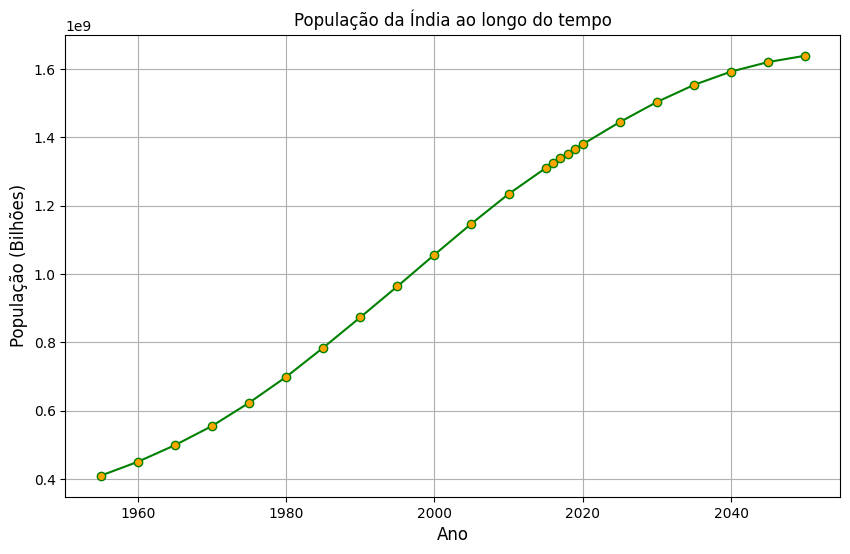

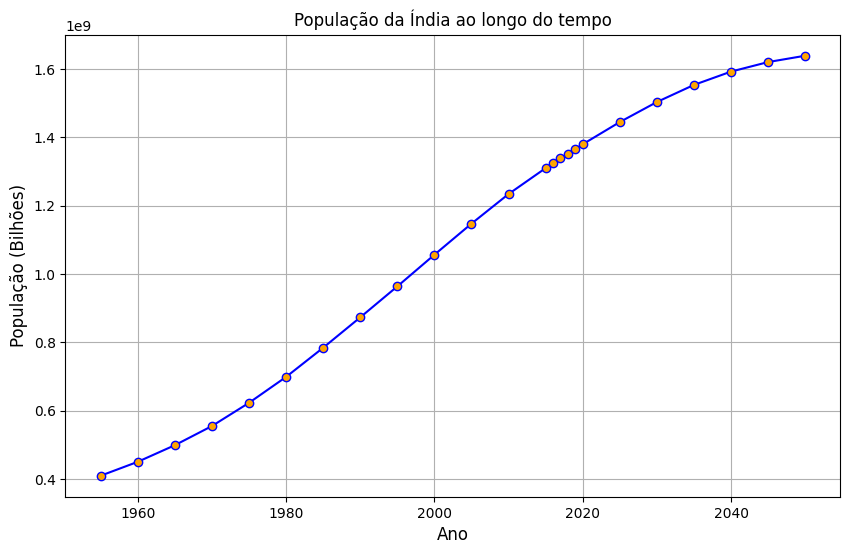

In [92]:
plt.figure(figsize=(10,6))
plt.plot(df['Year'],df['Population'],color='green', marker='o',markerfacecolor='orange')
plt.title('População da Índia ao longo do tempo',fontsize=12)
plt.xlabel('Ano',fontsize=12)
plt.ylabel('População (Bilhões)', fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df['Year'],df['Population'],color='blue', marker='o',markerfacecolor='orange')
plt.title('População da Índia ao longo do tempo',fontsize=12)
plt.xlabel('Ano',fontsize=12)
plt.ylabel('População (Bilhões)', fontsize=12)
plt.grid(True)
plt.show()

Visualização da população indiana, em bilhões, ao longo do tempo, com uma clara tendência crescente que começa a arrefecer a partir de 1990, indicando crescimentos populacionais decrescentes.

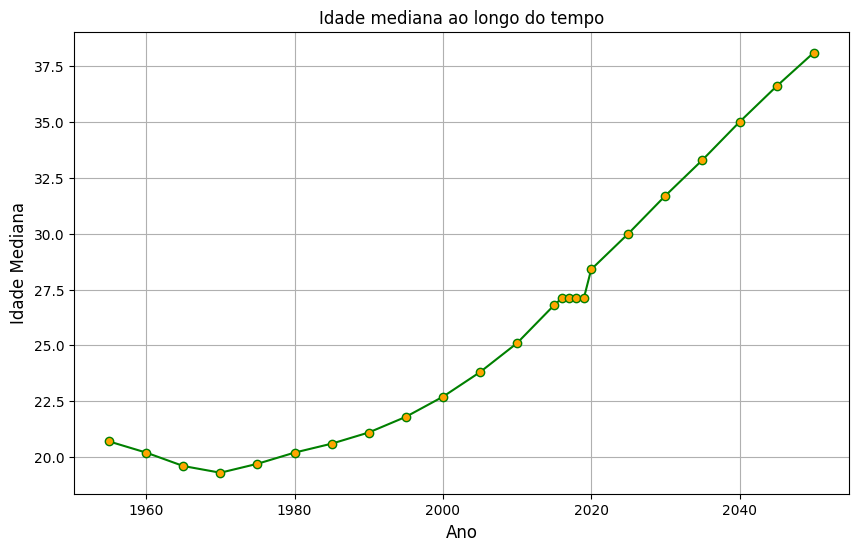

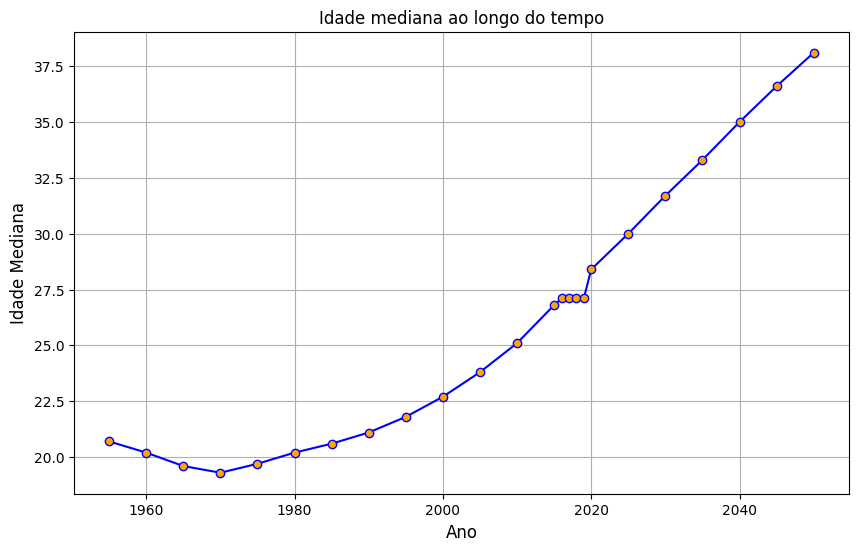

In [93]:
plt.figure(figsize=(10,6))
plt.plot(df['Year'],df['Median Age'],color='green', marker='o',markerfacecolor='orange')
plt.title('Idade mediana ao longo do tempo',fontsize=12)
plt.xlabel('Ano',fontsize=12)
plt.ylabel('Idade Mediana', fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df['Year'],df['Median Age'],color='blue', marker='o',markerfacecolor='orange')
plt.title('Idade mediana ao longo do tempo',fontsize=12)
plt.xlabel('Ano',fontsize=12)
plt.ylabel('Idade Mediana', fontsize=12)
plt.grid(True)
plt.show()

Idade mediana da população indiana ao longo do tempo. Apresenta uma trajetória crescente desde 1970. Sua importância deve-se ao fato de que, com o envelhecimento da estrutura etária populacional, surgem novos desafios relacionados ao regime previdenciário, ao sistema de saúde, ao consumo de bens e serviços e outros aspectos importantes ao país.  

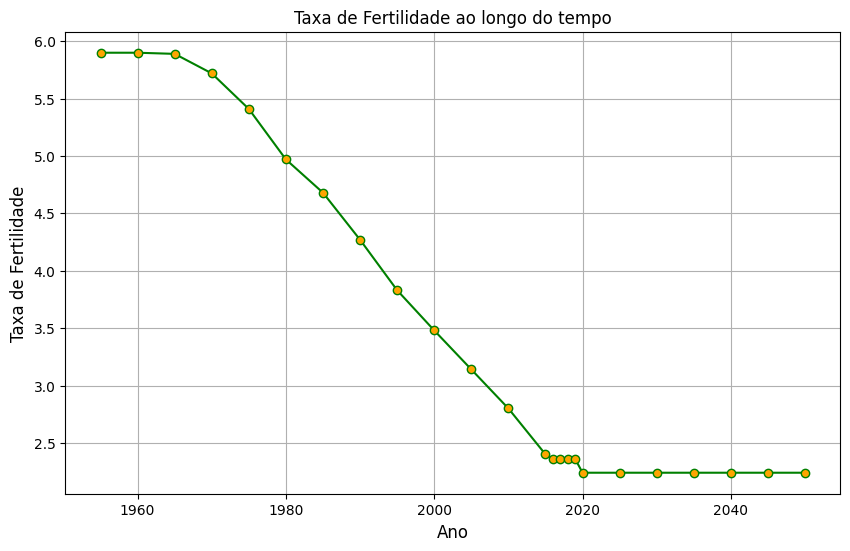

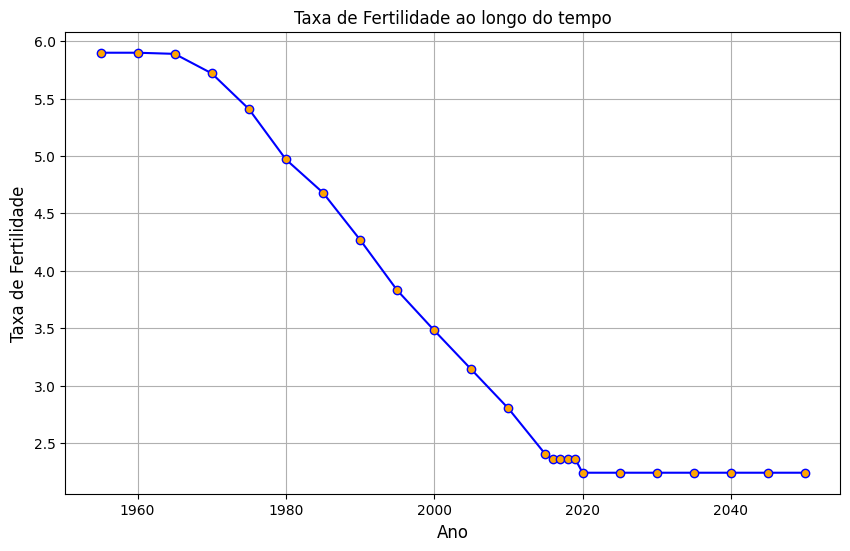

In [94]:
plt.figure(figsize=(10,6))
plt.plot(df['Year'],df['Fertility Rate'],color='green', marker='o',markerfacecolor='orange')
plt.title('Taxa de Fertilidade ao longo do tempo',fontsize=12)
plt.xlabel('Ano',fontsize=12)
plt.ylabel('Taxa de Fertilidade', fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df['Year'],df['Fertility Rate'],color='blue', marker='o',markerfacecolor='orange')
plt.title('Taxa de Fertilidade ao longo do tempo',fontsize=12)
plt.xlabel('Ano',fontsize=12)
plt.ylabel('Taxa de Fertilidade', fontsize=12)
plt.grid(True)
plt.show()

Taxa de fertilidade da população indiana ao longo do tempo. Apresenta uma trajetória decrescente, mas ainda positiva, em um valor que supera o número de falecidos, indicando tendências crescentes no tamanho da população.

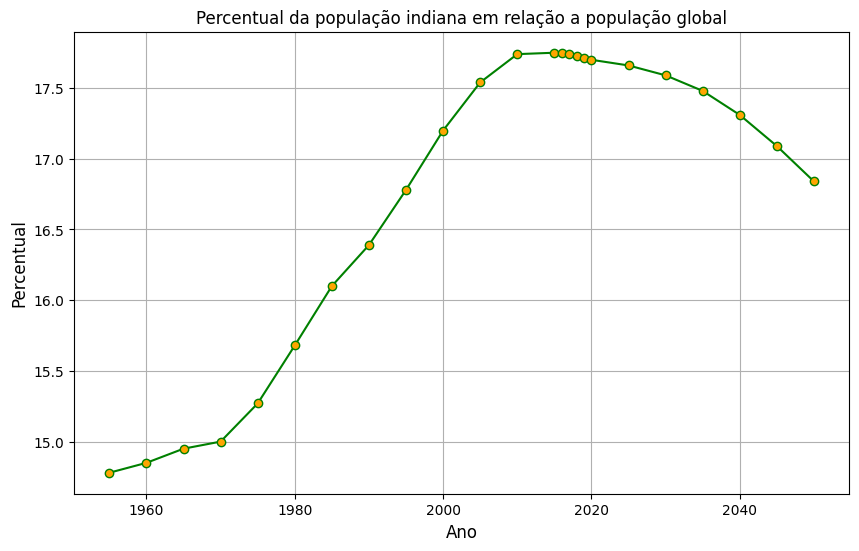

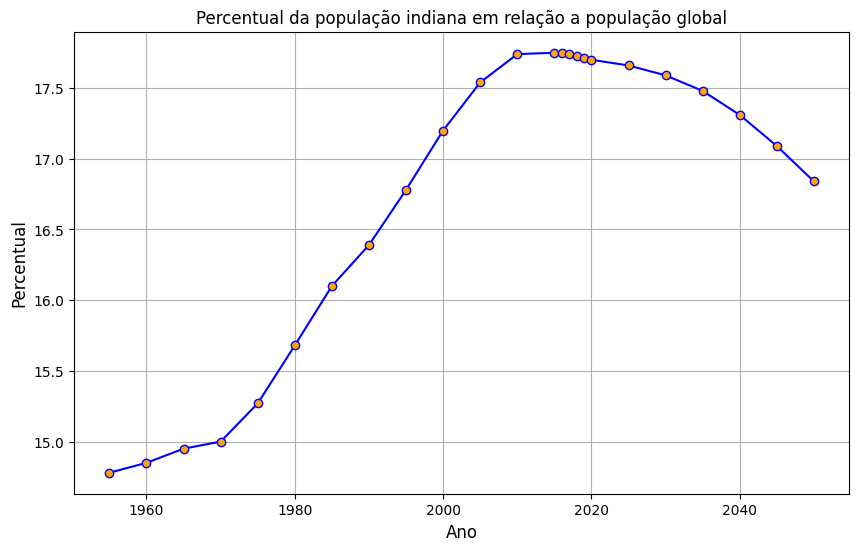

In [95]:
plt.figure(figsize=(10,6))
plt.plot(df['Year'],df["Country's Share of\nWorld Pop"],color='green', marker='o',markerfacecolor='orange')
plt.title('Percentual da população indiana em relação a população global',fontsize=12)
plt.xlabel('Ano',fontsize=12)
plt.ylabel('Percentual', fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df['Year'],df["Country's Share of\nWorld Pop"],color='blue', marker='o',markerfacecolor='orange')
plt.title('Percentual da população indiana em relação a população global',fontsize=12)
plt.xlabel('Ano',fontsize=12)
plt.ylabel('Percentual', fontsize=12)
plt.grid(True)
plt.show()


Percentual da população indiana em relação a população global ao longo do tempo. Apresenta uma trajetória crescente até 2016, quando começa a declinar. Contribui, junto com outros indicadores, para a compreensão do consumo global, aspectos relacionados ao meio ambiente, fluxo financeiro e de capitais e outros fatores referentes as relações da Índia com o restante dos países.

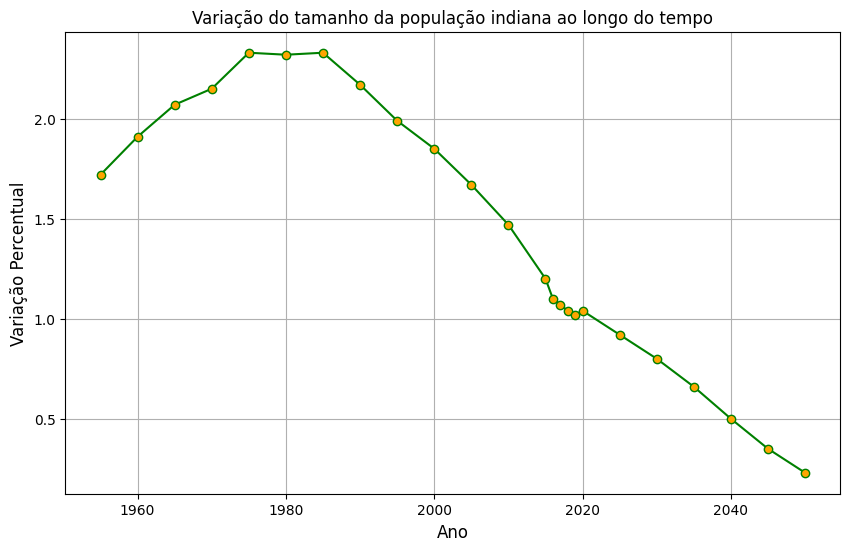

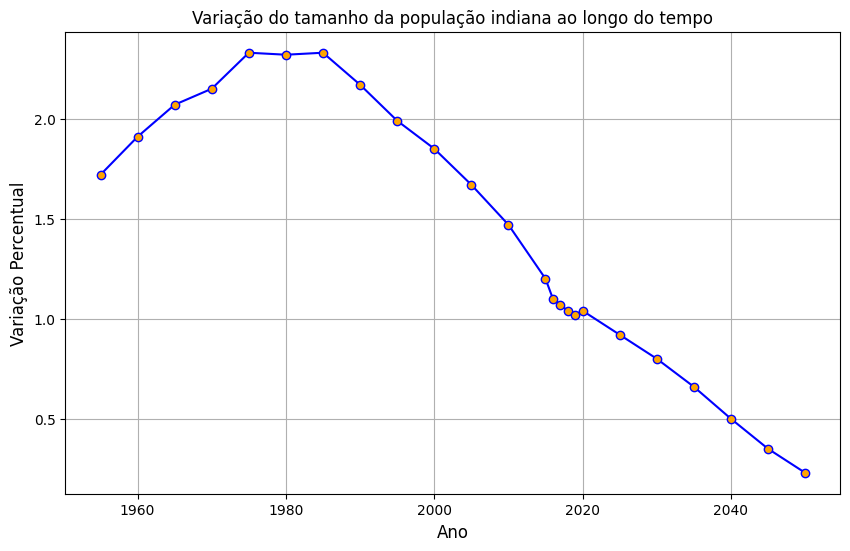

In [96]:
plt.figure(figsize=(10,6))
plt.plot(df['Year'],df["Yearly % \nChange"],color='green', marker='o',markerfacecolor='orange')
plt.title('Variação do tamanho da população indiana ao longo do tempo',fontsize=12)
plt.xlabel('Ano',fontsize=12)
plt.ylabel('Variação Percentual', fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df['Year'],df["Yearly % \nChange"],color='blue', marker='o',markerfacecolor='orange')
plt.title('Variação do tamanho da população indiana ao longo do tempo',fontsize=12)
plt.xlabel('Ano',fontsize=12)
plt.ylabel('Variação Percentual', fontsize=12)
plt.grid(True)
plt.show()

Variação percentual da população indiana ao longo do tempo. Apresenta uma trajetória crescente até 1985, quando começa a declinar sem, no entanto, variar negativamente, permitindo compreender um crescimento populacional mais acelerado que, a partir de 1985, começa a arrefecer.

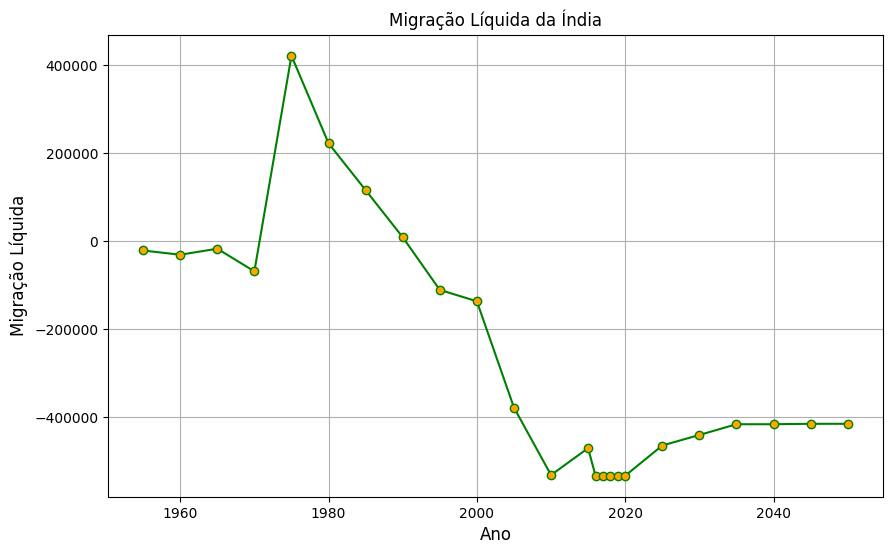

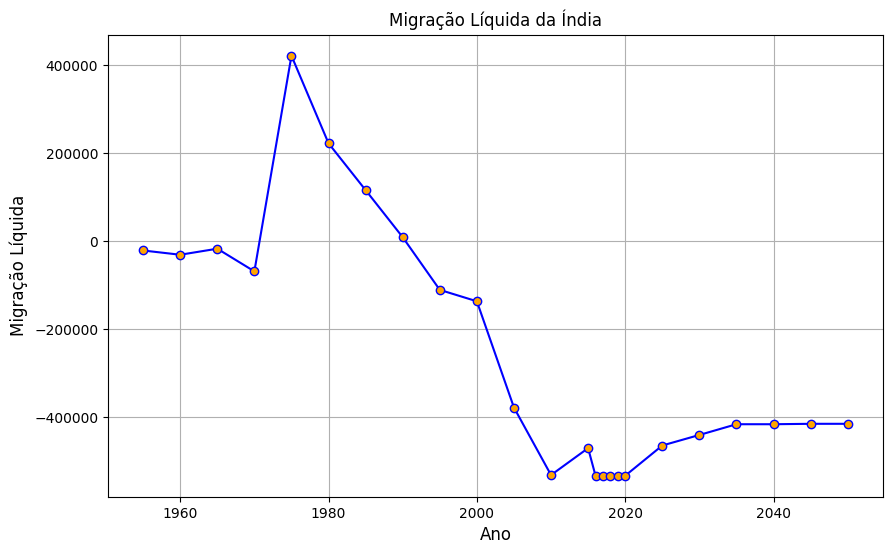

In [97]:
plt.figure(figsize=(10,6))
plt.plot(df['Year'],df["Migrants (net)"],color='green', marker='o',markerfacecolor='orange')
plt.title('Migração Líquida da Índia',fontsize=12)
plt.xlabel('Ano',fontsize=12)
plt.ylabel('Migração Líquida', fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df['Year'],df["Migrants (net)"],color='blue', marker='o',markerfacecolor='orange')
plt.title('Migração Líquida da Índia',fontsize=12)
plt.xlabel('Ano',fontsize=12)
plt.ylabel('Migração Líquida', fontsize=12)
plt.grid(True)
plt.show()

A migração líquida é calculada considerando o número de pessoas que saem e entram no país. A Índia, com exceção de alguns anos na segunda metade do século XX, apresenta uma migração líquida negativa, indicando que mais pessoas saem do país. Tal dado nos auxilia na compreensão do tamanho da populacão indiana.  

In [98]:
df_forecast = df[:-6]
df_forecast.head()

Year  Yearly % \nChange  Yearly\nChange  Migrants (net)  Median Age  \
0  1955               1.72         6711079        -21140.0        20.7   
1  1960               1.91         8133417        -30805.0        20.2   
2  1965               2.07         9715129        -17078.0        19.6   
3  1970               2.15        11213294        -68569.0        19.3   
4  1975               2.33        13582621        421208.0        19.7   

   Fertility Rate  Density (P/Km²)  Urban\nPop %  Urban Population  \
0            5.90              138          17.6          71958495   
1            5.90              152          17.9          80565723   
2            5.89              168          18.7          93493844   
3            5.72              187          19.7         109388950   
4            5.41              210          21.3         132533810   

   Country's Share of\nWorld Pop World Population  India\nGlobal Rank  \
0                          14.78       2773019936                   2   
1                          14.85       3034949748                   2   
2                          14.95       3339583597                   2   
3                          15.00       3700437046                   2   
4                          15.27       4079480606                   2   

   Population  
0   409880595  
1   450547679  
2   499123324  
3   555189792  
4   623102897

O dataframe passa por um processo de slicing para compreender dados apenas até o ano de 2020. Tal subconjunto servirá de base para a realização da previsão da série temporal.

In [99]:
result = adfuller(df_forecast['Population'])
print('p-value:', result[1])

p-value: 0.0894597015553632


O Teste Dickey Fuller Aumento permite compreender se uma série é estacionária, ou seja, se a média, a variância e a autocorrelação tendem a não mudar ao longo do tempo. Um p-valor menor que 0.05 indica que a série é estacionária, o que não se confirma no teste realizado.

In [100]:
df_forecast = df_forecast.copy()
df_forecast['Population_log'] = np.log(df_forecast['Population'])
result = adfuller(df_forecast['Population_log'])
print('p-value:', result[1])

p-value: 0.0005019683842526587


Para tentar transformar a série em estacionária, é aplicada a transfomação logarítmica, que reduz o p-value para 0.0005, indicando que a série passou a ser estacionária. O processo de tornar a série estacionária é importante porque, ao dominuir a variância nos dados, contribui para a realização de previsões mais assertivas.

In [101]:
df_forecast.head()

Year  Yearly % \nChange  Yearly\nChange  Migrants (net)  Median Age  \
0  1955               1.72         6711079        -21140.0        20.7   
1  1960               1.91         8133417        -30805.0        20.2   
2  1965               2.07         9715129        -17078.0        19.6   
3  1970               2.15        11213294        -68569.0        19.3   
4  1975               2.33        13582621        421208.0        19.7   

   Fertility Rate  Density (P/Km²)  Urban\nPop %  Urban Population  \
0            5.90              138          17.6          71958495   
1            5.90              152          17.9          80565723   
2            5.89              168          18.7          93493844   
3            5.72              187          19.7         109388950   
4            5.41              210          21.3         132533810   

   Country's Share of\nWorld Pop World Population  India\nGlobal Rank  \
0                          14.78       2773019936                   2   
1                          14.85       3034949748                   2   
2                          14.95       3339583597                   2   
3                          15.00       3700437046                   2   
4                          15.27       4079480606                   2   

   Population  Population_log  
0   409880595       19.831376  
1   450547679       19.925974  
2   499123324       20.028364  
3   555189792       20.134821  
4   623102897       20.250222

Demonstração das cinco primeiras linhas do dataframe após a aplicação da transformação logarítmica.

In [102]:
model = auto_arima(df_forecast['Population_log'], seasonal=False, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-83.076, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-90.039, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-88.946, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-88.780, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-89.516, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-86.897, Time=0.61 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 1.052 seconds


Aplicação do auto_arima para a descoberta dos principais parâmetros do modelo, a saber, p (autorregressiva), d (diferenciação) e q (média movel). Tais parâmetros são atribuídos a variável model, que depois será utilizada para realizar a previsão.

In [103]:
forecast_arima, conf_int = model.predict(n_periods=5, return_conf_int=True)

O modelo é utilizado para prever os próximos cincoa nos (2021 à 2025), além de trazer o intervalo de confiança da previsão.

In [104]:
forecast_years = [2025, 2024, 2023, 2022, 2021]
forecast_arima = pd.DataFrame({
    'Year': forecast_years,
    'Forecast': forecast_arima,
    'Lower CI': conf_int[:, 0],
    'Upper CI': conf_int[:, 1]
})

Os dados da previsão, do intervalo de confiança mínimo e do máximo são atribuídos ao dataframe forecast_arima.

In [105]:
forecast_arima = forecast_arima.sort_values(by='Year')
forecast_arima

Year   Forecast   Lower CI   Upper CI
22  2021  21.015409  20.829243  21.201575
21  2022  21.031986  20.894493  21.169479
20  2023  21.043269  20.949344  21.137194
19  2024  21.049258  20.993127  21.105389
18  2025  21.049952  21.024850  21.075055

Ordenação pelo ano e demonstração dos dados previstos em conjunto com seus intervalos de confiança.

In [106]:
forecast_arima['Forecast'] = np.exp(forecast_arima['Forecast'])
forecast_arima['Lower CI'] = np.exp(forecast_arima['Lower CI'])
forecast_arima['Upper CI'] = np.exp(forecast_arima['Upper CI'])
forecast_arima = forecast_arima.applymap(lambda x: '{:.0f}'.format(x) if isinstance(x, (int, float)) else x)
forecast_arima

<ipython-input-106-12a3366a0855>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  forecast_arima = forecast_arima.applymap(lambda x: '{:.0f}'.format(x) if isinstance(x, (int, float)) else x)


Year    Forecast    Lower CI    Upper CI
22  2021  1339294230  1111796156  1613343441
21  2022  1361681282  1186760744  1562383928
20  2023  1377132251  1253673327  1512749132
19  2024  1385404337  1309782249  1465392570
18  2025  1386366797  1351998547  1421608699

É aplicada a técnica de exponênciação nos valores da previsão para reverter a transformação logaritmica e facilitar a compreensão dos resultados.

In [107]:
mae = mean_absolute_error(df['Population'][-6:-5], forecast_arima['Forecast'][-1:])
mse = mean_squared_error(df['Population'][-6:-5], forecast_arima['Forecast'][-1:])

In [108]:
print(f"Erro Absoluto Médio (MAE): {mae:.0f}")
print(f"Erro Quadrático Médio (MSE): {mse:.0f}")

Erro Absoluto Médio (MAE): 58644823
Erro Quadrático Médio (MSE): 3439215264701329


São utilizadas as métricas Erro Absoluto Médio e Erro Quadrático Médio para avaliar a precisão do modelo em relação a previsão existente no conjunto de dados.

In [109]:
X = df_forecast[['Year']]
y = df_forecast['Population_log']
model = LinearRegression()
model.fit(X, y)
future_years = pd.DataFrame({'Year': [2021, 2022, 2023, 2024, 2025]})
forecast_linear_regressor = model.predict(future_years)
df_linear_regressor = pd.DataFrame({
    'Year': future_years['Year'],
    'Forecast': forecast_linear_regressor
})
print("Previsões para os próximos 5 anos:")
print(forecast_linear_regressor)

Previsões para os próximos 5 anos:
[21.11695319 21.13584104 21.1547289  21.17361675 21.19250461]


Os dados são novamente previstos, desta vez utilizando um modelo de regressão linear.

In [110]:
df_linear_regressor['Forecast'] = np.exp(df_linear_regressor['Forecast'])

Aplicação da exponenciação para reversão da transformação logarítmica.

In [111]:
df_linear_regressor

Year      Forecast
0  2021  1.482437e+09
1  2022  1.510703e+09
2  2023  1.539508e+09
3  2024  1.568863e+09
4  2025  1.598777e+09

Resultados da previsão.

In [112]:
mae = mean_absolute_error(df['Population'][-6:-5], df_linear_regressor['Forecast'][-1:])
mse = mean_squared_error(df['Population'][-6:-5], df_linear_regressor['Forecast'][-1:])

In [113]:
print(f"Erro Absoluto Médio (MAE): {mae:.0f}")
print(f"Erro Quadrático Médio (MSE): {mse:.0f}")

Erro Absoluto Médio (MAE): 153765070
Erro Quadrático Médio (MSE): 23643696808353028


São utilizadas as métricas Erro Absoluto Médio e Erro Quadrático Médio para avaliar a precisão do modelo em relação a previsão existente no conjunto de dados.

##Conclusão
##### Com base nos resultados gerados pelas previsões, tanto a pré-existente no conjunto de dados como as duas que foram realizadas neste script, é possível perceber uma trajetória crescente na população indiana, correspondendo a um intervalo entre 17 e 18% da população global e indicando que, a cada 5 ou 6 pessoas no mundo, uma será indiana. Tal constatação nos da indícios a respeito dos desafios a serem enfrentados neste século, sejam eles relacionados ao meio ambiente, consumo global, fluxo financeiro e de capitais, reorganização das cadeias produtivas globais e etc. Outro aspecto importante a ser considerado é a questão cultural. Em um mundo cada vez mais globalizado, um país como a Índia, rico em tradições, costumes, gastronomia, arquitetura e outros aspectos culturais tem muito a oferecer e ensinar ao restante do mundo.

Os números das previsões, especialmente a realizada pelo modelo ARIMA, são próximos do contido no conjunto de dados. Existem diversos outros modelos de previsão de séries temporais que podem ser aplicados, mas por fugirem do escopo princial deste trabalho, qual seja, a aplicação das técnicas de análise, pré-processamento de dados, visualização da informação e engenharia de software, ficarão para uma próxima oportunidade.